<a href="https://colab.research.google.com/github/Tim3s/Machine-Learning-Study/blob/main/4_2_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>로지스틱 손실 함수: 손실의 정도를 나타냄</p>
<p>이진 분류의 경우: -log(예측 확률) if target == 1 else -log(1 - 예측 확률)</p>

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [3]:
fish_input = fish.to_numpy()[:, 1:]
fish_target = fish.to_numpy()[:, 0]

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier()
sc.loss = 'log'
sc.max_iter = 10
sc.random_state = 42
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.773109243697479 0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [9]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.8151260504201681 0.825


In [10]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [12]:
for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

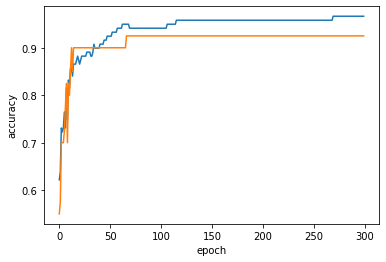

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [17]:
sc = SGDClassifier(max_iter=100, loss='log', random_state=42, tol=None)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.957983193277311 0.925
